In [16]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import matplotlib.pyplot as plt

In [8]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [10]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.tobs).filter(extract("month", Measurement.date) == 6).all()

[(78.0,),
 (76.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (82.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (73.0,),
 (70.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (73.0,),
 (73.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (76.0,),


In [11]:
#  3. Convert the June temperatures to a list.
june_temp = []
june_temp = session.query(Measurement.tobs).filter(extract("month", Measurement.date) == 6).all()

In [12]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temp, columns=['June Temps'])
print(june_df)

      June Temps
0           78.0
1           76.0
2           78.0
3           76.0
4           77.0
...          ...
1695        79.0
1696        74.0
1697        74.0
1698        76.0
1699        75.0

[1700 rows x 1 columns]


In [13]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [17]:
# Query for histograms
def graphHist(df):
    df.plot.hist(bins=12)
    plt.tight_layout()

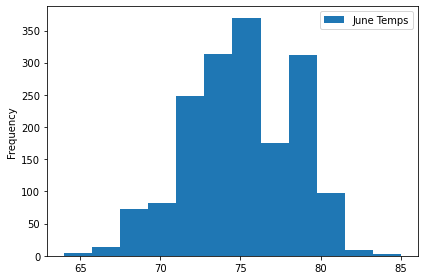

In [18]:
# Create graph
graphHist(june_df)

## D2: Determine the Summary Statistics for December

In [35]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12)

In [36]:
# 7. Convert the December temperatures to a list.
dec_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).all()

In [37]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns=['date', 'Dec Temps'])

In [38]:
# 9. Calculate and print out the summary statistics for the December temperature DataFrame.
dec_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


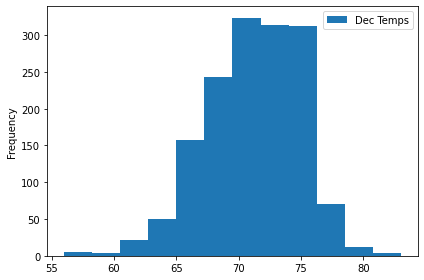

In [39]:
# Create graph for December temperature
graphHist(dec_df)


# More Weather Data Analysis 

In [27]:
# Write June precipitation analysis
june_prcp = session.query(Measurement.prcp).filter(extract("month", Measurement.date) == 6).all()
june_prcp_df = pd.DataFrame(june_prcp, columns = ['June Precipitation'])
june_prcp_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


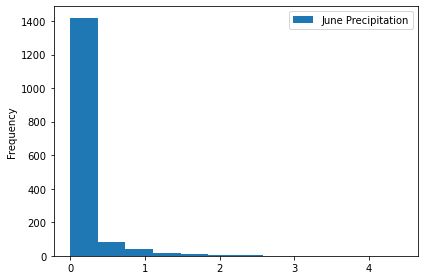

In [28]:
graphHist(june_prcp_df)

In [29]:
# December precipitation analysis
dec_prcp = session.query(Measurement.prcp).filter(extract("month", Measurement.date) == 12).all()
dec_prcp_df = pd.DataFrame(dec_prcp, columns = ['December Precipitation'])
dec_prcp_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


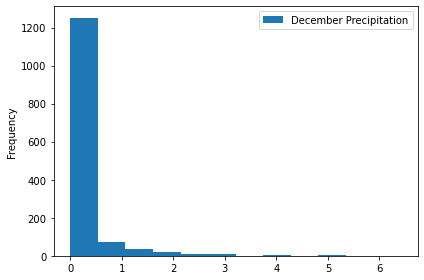

In [30]:
graphHist(dec_prcp_df)

In [31]:
# Find June temperatures based on station
stations_june_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).\
                     group_by(Measurement.station).\
                     filter(extract("month", Measurement.date) == 6).all()

stations_june_df = pd.DataFrame(stations_june_temp, columns = ['Station ID', 'Avg Temperature'])
stations_june_df

,Station ID,Avg Temperature
0,USC00511918,74.139394
1,USC00513117,74.050847
2,USC00514830,76.005376
3,USC00516128,71.937220
4,USC00517948,76.655405
5,USC00518838,73.394737
6,USC00519281,73.271186
7,USC00519397,77.559322
8,USC00519523,76.668103
